<a href="https://colab.research.google.com/github/Marceline37/securit-/blob/main/Classification%20des%20attaques%20DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyses des différentes attaques DDoS** 

---
*-	Apache2*
*-	Back*
*-	Land*
*-	Neptune*
*-	Mailbomb*
*-	Pod*
*-	Srocesstable*
*-	Smurf*
*-	Teardrop*
*-	Udpstorm*
*-	Worm*








# 1 Librairies

In [1]:
!pip install scikit-plot

In [2]:
# Import et traitement des données
import numpy as np 
import pandas as pd 

# Graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import matplotlib.gridspec as gridspec 

#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Machine learning - Modèle d'apprentissage supervisé
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Machine learning - Modèle selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine learning - Métriques d'erreur
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt



# 2 Explorations et analyses des données

In [3]:
test = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTest%2B.txt'
train ='https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B.txt'
train_20p = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B_20Percent.txt'

df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [4]:
# Mise en place des noms de colonnnes sur les deux dataframes
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# Descrition du jeu du données train
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
# Informations du jeu du données Train 'df'
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
# Informations du jeu du données test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [9]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
test_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

*Il y a  4 variables catégorielles dans le jeux de données et aucune valeurs nulles dans les deux jeux de données.*

,Missing Records,Percentage (%)
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


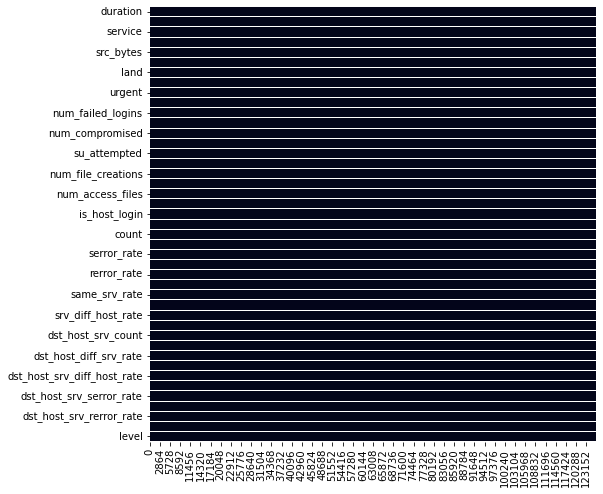

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), linecolor='blue', cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [12]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 

        ax.hist(df[col], bins=20) 
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

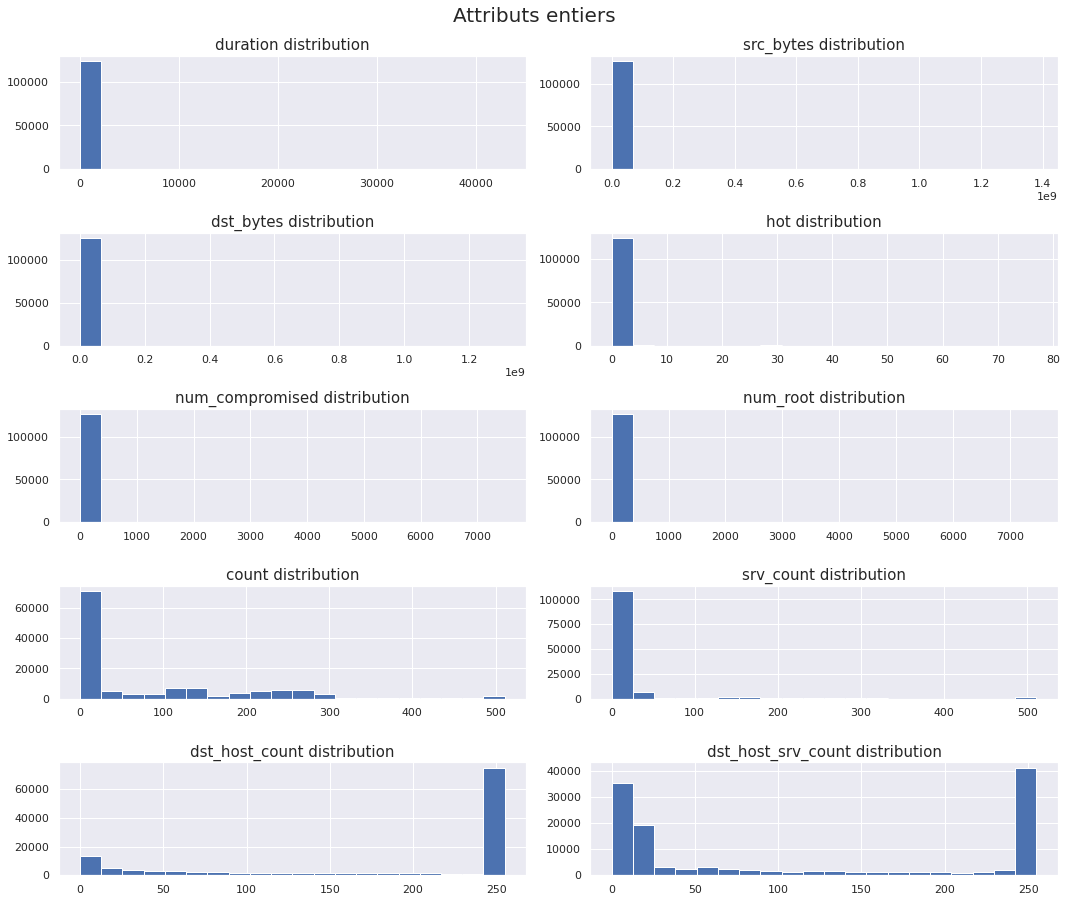

In [ ]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
plot_hist(df, hist_cols, 'Attributs entiers')

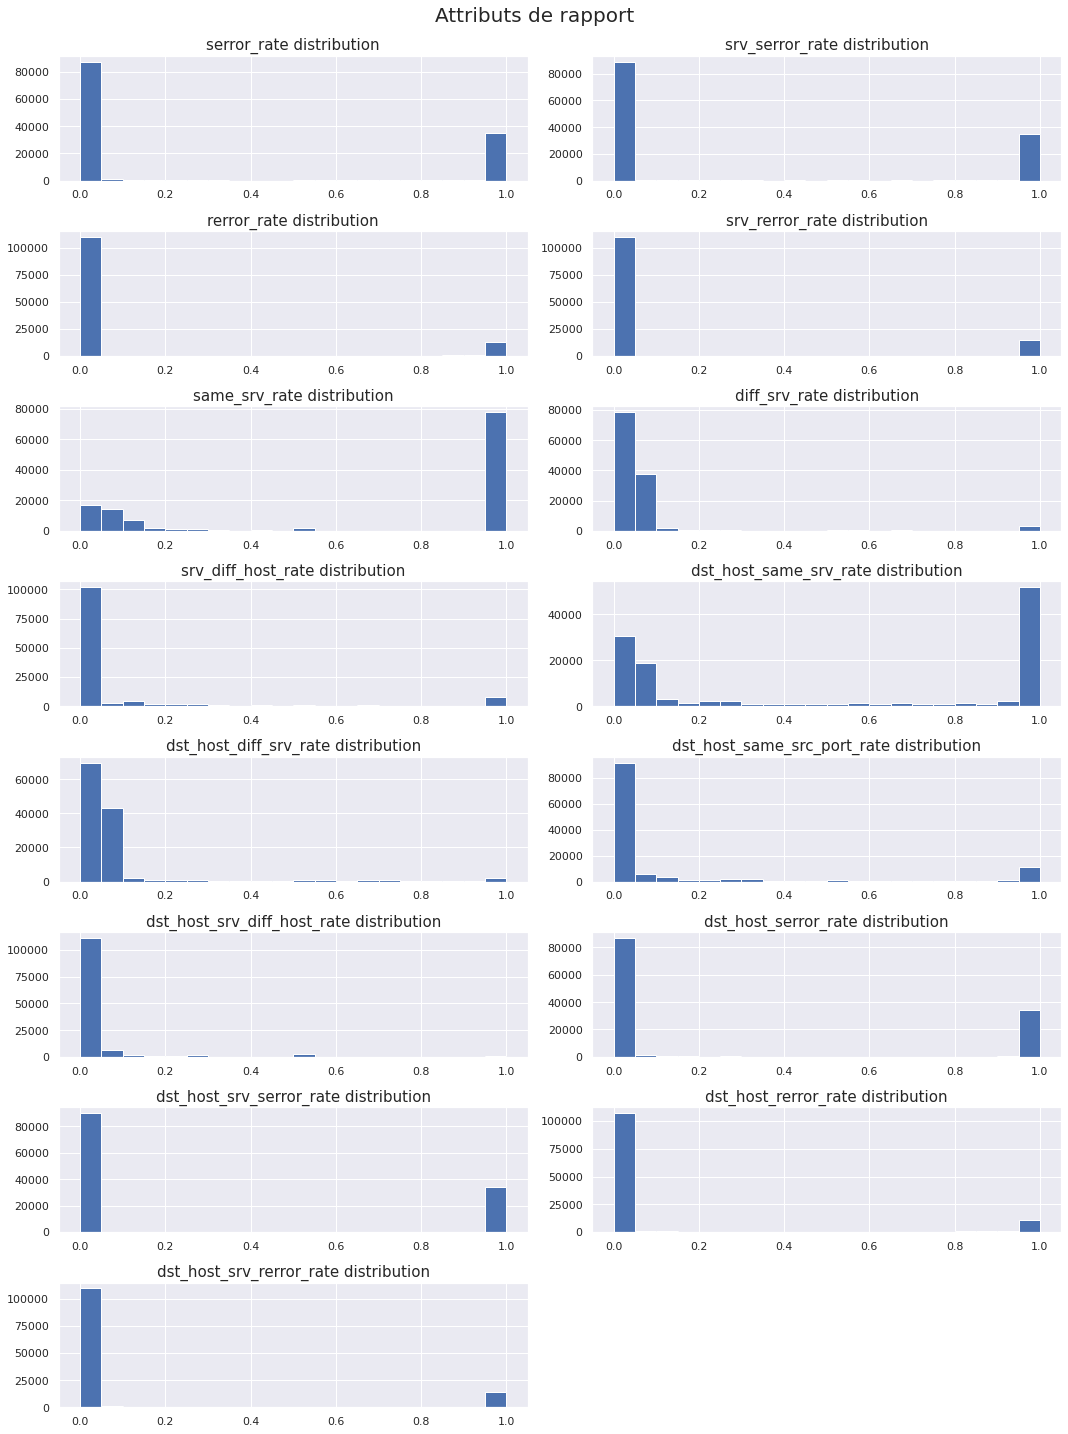

In [ ]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
plot_hist(df, rate_cols, 'Attributs de rapport')

*Visualisation de la distribution des entités dans le jeu de données.*

In [13]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_state'] = is_attack
test_df['attack_state'] = test_attack

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


*Exploration de la  colonne d'attaque catégorique numériquement en créant la colonne attak_state, où j'afficherais les états d'attaque comme 1 et les états de non-attaque comme 0.*

*Ainsi, il sera possible de  voir combien de données d'attaque nous avons et combien de données normales il y a.*

In [14]:
(df.attack_state == 1).sum()/len(df)

0.4654208871812784

*Il y a  environ 46% d'attaques dans le jeu de données train 'df'.*

In [15]:
(test_df.attack_state == 1).sum()/len(df) 

0.10186390626488426

Il y a environ 10% d'attaques dans le jeu de données test.

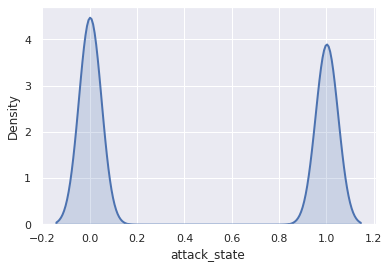

In [ ]:
# Visualisation de la densité entre les deux jeux de données. 'df' et 'train'
sns.kdeplot(
   data=df, x="attack_state",
   fill=True, common_norm=False, palette="crest",
   alpha=.2, linewidth=2,
)

In [16]:
# Je définie les nombres de situation d'attaques et ceux sans attaques 
nbre_attack = (df.attack_state == 1).sum()
nbre_sans_attack= (df.attack_state == 0).sum()
myData = [nbre_attack , nbre_sans_attack]

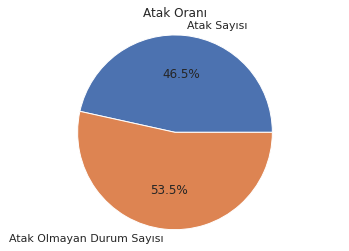

In [ ]:
my_labels = 'Atak Sayısı','Atak Olmayan Durum Sayısı'
plt.pie(myData,labels=my_labels,autopct='%1.1f%%')
plt.title('Atak Oranı')
plt.axis('equal')
plt.show()

In [ ]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 
        ax.hist(df[col], bins=20) 
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

In [17]:
#  Définir les différents types d'attaques.
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','U2R','R2L']

def class_attack(attack):
    if attack in DoS_attacks:
        attack_type = 1
    elif attack in Probe_attacks:
        attack_type = 2
    elif attack in U2R:
        attack_type = 3
    elif attack in R2L:
        attack_type = 4
    else:
        attack_type = 0       
    return attack_type
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

test_attack_class = test_df.attack.apply(class_attack)
test_df['attack_class'] = test_attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [18]:
# Observons les 5 dernières lignes du jeux de données train 'df'.
df.tail() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,0,0
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,0,0
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,1,1
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,0,0


In [19]:
Normal = (df.attack_class == 0).sum()/len(df)
print('Normal = ' , Normal)
DoSDDoS = (df.attack_class == 1).sum()/len(df)
print('DoS/DDoS = ' , DoSDDoS)
Probe = (df.attack_class == 2).sum()/len(df)
print("Probe = " , Probe )
U2R = (df.attack_class == 3).sum()/len(df)
print('U2R = ', U2R)
R2L = (df.attack_class == 4).sum()/len(df)
print('R2L = ' ,R2L)

Normal =  0.5346505572666942
DoS/DDoS =  0.3645810180040009
Probe =  0.09252849839646905
U2R =  0.00034134569586892325
R2L =  0.007898580636966945


*Il y a 5 types d'attaques qui sont défini dans  le jeux de données train 'df'*

* *Normal à 53%.*
* *DoS/DDoS à 36%, c'est la dessus que je mettre en place ma classification*
* *Probe à 0.9%.*
* *R2L à 0.07%*
* *U2R à 0.003%.*

In [20]:
attack_vs_class = pd.crosstab(df.attack_class, df.attack)
attack_vs_class

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0
2,0,0,0,0,0,3599,0,0,0,0,...,0,0,2931,0,3633,0,0,0,0,0
3,0,30,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
4,0,0,8,53,11,0,0,0,7,0,...,4,0,0,0,0,0,2,0,890,20


In [21]:
attack_vs_DDoS = pd.crosstab(df.attack_class == 1, df.attack)
attack_vs_DDoS

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
False,0,30,8,53,11,3599,0,9,7,0,...,4,0,2931,10,3633,0,2,0,890,20
True,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0


In [ ]:
# Visualisons les distributions
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # Configuration pour mapper les couleurs
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # Construction des subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # Parcourir les ensembles de données et créer les graphiques
    for count, data_set in enumerate(data_list): 
        
        # Mise à jour notre palette de couleurs avec de nouvelles valeurs
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # Construction des wedges
        wedges,texts = axs[count].pie(data_set, shadow = True, #autopct='%1.1f%%'
                           colors=[cdict[v] for v in data_set.index])

        # Mise en place de la légende
        axs[count].legend(wedges, data_set.index,
                           title="Situation",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # Définission du titre
        axs[count].set_title(labels[count])
        
    return axs 

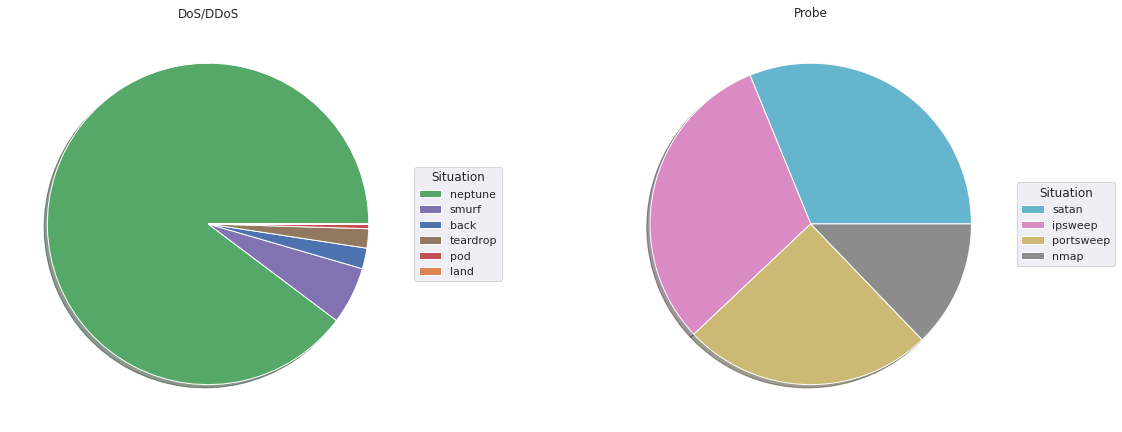

In [ ]:
DoSDDoS_class = df.loc[df.attack_class == 1].attack.value_counts()
probe_class = df.loc[df.attack_class == 2].attack.value_counts()

flag_axs = bake_pies([DoSDDoS_class , probe_class], ['DoS/DDoS','Probe'])        
plt.show()

*Dans le premier camembert ce cont les attaques DDos.*

*On peut y constaté qu'il y a 6 types différents de sous-attaques.*

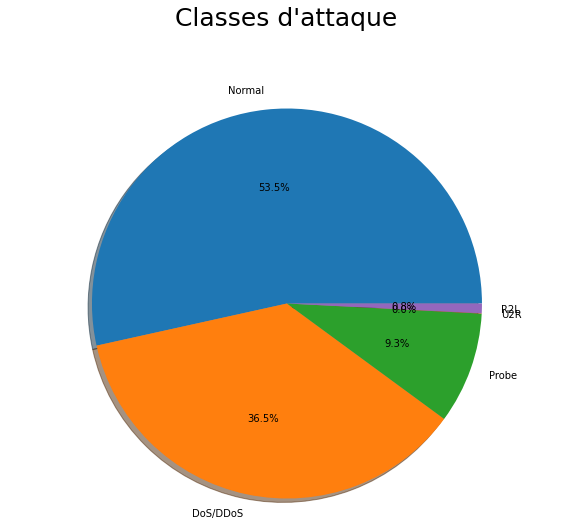

In [22]:
# Répartition de la classes d'attaques en général
Normal = (df.attack_class == 0).sum()
DoSDDoS = (df.attack_class == 1).sum()
Probe = (df.attack_class == 2).sum()
U2R = (df.attack_class == 3).sum()
R2L = (df.attack_class == 4).sum()
myData = [Normal , DoSDDoS,Probe,U2R,R2L]

my_labels = 'Normal','DoS/DDoS' ,'Probe' ,'U2R' , 'R2L'
plt.figure(figsize = (10, 8))
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title("Classes d'attaque\n\n", size = '25')
plt.axis('equal')
plt.show()

## Analyse bivariée (variable catégorielle)

In [23]:
attack_vs_protocol = pd.crosstab((df.attack_class == 1), df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_class,,,
False,5444,60500,14101
True,2847,42188,892


*Création de la colonne 'attack_class' que j'ajoute dans le jeux de données.*

*Sous cette colonne se trouve les équivalents numériques des classes de nos attaques.*

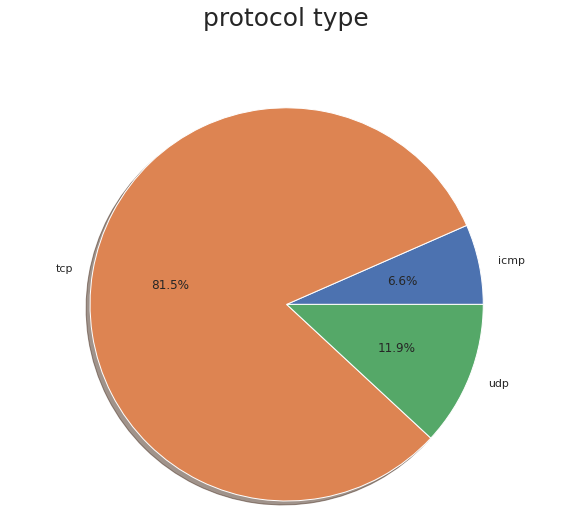

In [ ]:
icmp = attack_vs_protocol.icmp.sum()
tcp = attack_vs_protocol.tcp.sum()
udp = attack_vs_protocol.udp.sum()
myData = [icmp , tcp,udp]
my_labels = 'icmp','tcp' ,'udp' 
plt.figure(figsize = (10, 8))
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title('protocol type\n\n',size = '25')
plt.axis('equal')
plt.show()

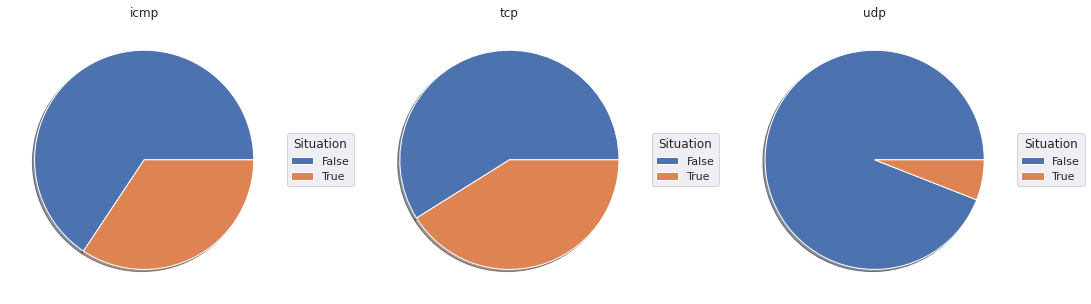

In [ ]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

Dans les graphiques et tableaux ci-dessus, nous voyons la répartition des types de protocoles dans les attaques DDoS des données.

Il existe plusieurs types d'attaques DDoS.

1.   Attaque DDoS basée sur le volume : par manipulation des paquets UDP et SYN
2.   Attaque DDoS basée sur le protocole : avec des vulnérabilités sur les paquets TCP/IP et UDP
3.   Attaque DDoS par inondation

*   *Attaque DDoS Ping Flood : via le protocole ICMP*
*   *Attaque DDoS SYN Flood : avec manipulation TCP/IP*
*   *UDP Flood se présente sous la forme d'une attaque DDoS*

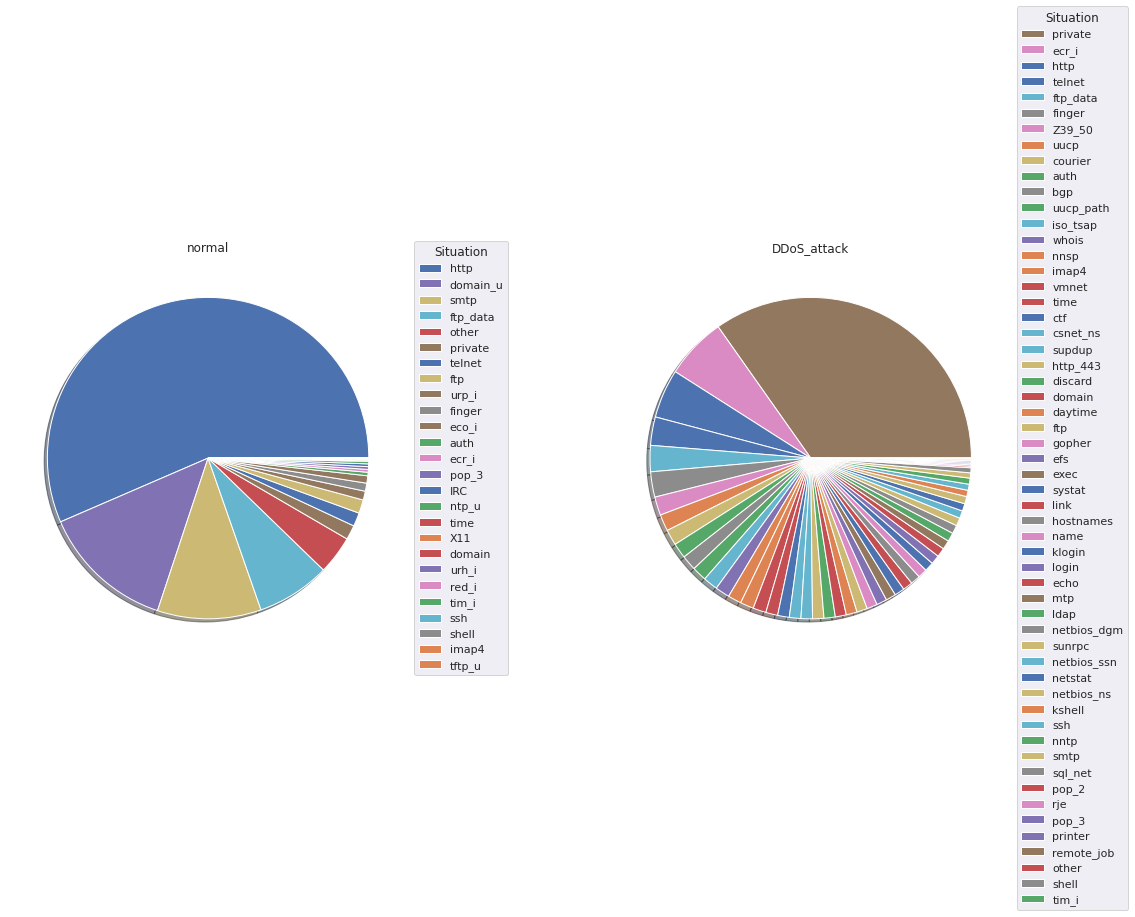

In [ ]:
normal_services = df.loc[df.attack_class == 0].service.value_counts()
DDoS_attack_services = df.loc[df.attack_class == 1].service.value_counts()

service_axs = bake_pies([normal_services, DDoS_attack_services], ['normal','DDoS_attack'])        
plt.show()

In [24]:
service_vs_protocol = pd.crosstab(df.service, df.protocol_type,)
service_vs_protocol

protocol_type,icmp,tcp,udp
service,,,
IRC,0,187,0
X11,0,73,0
Z39_50,0,862,0
aol,0,2,0
auth,0,955,0
...,...,...,...
urp_i,602,0,0
uucp,0,780,0
uucp_path,0,689,0


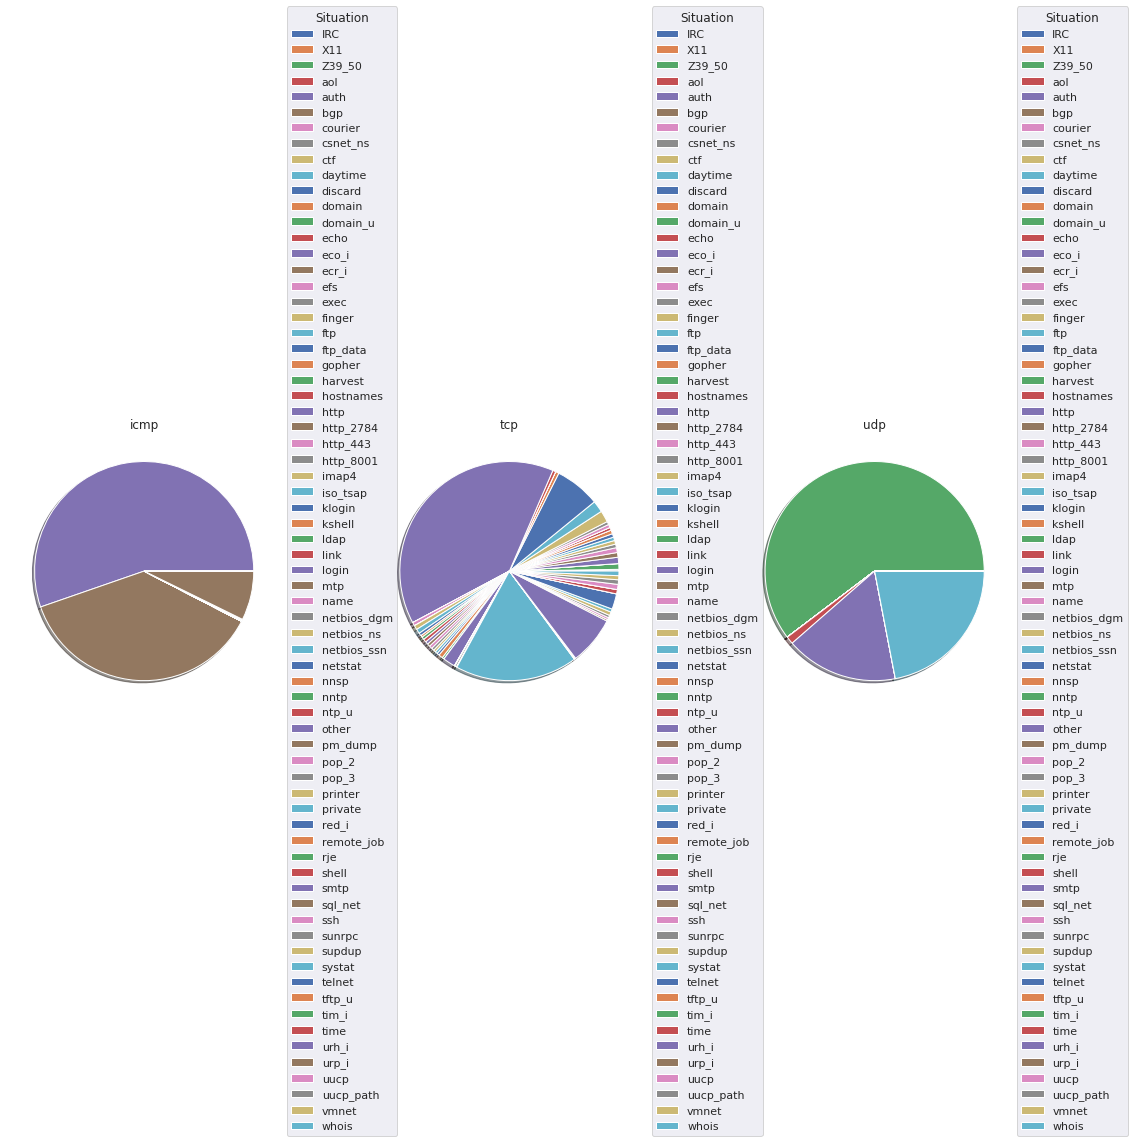

In [ ]:
icmp_service = service_vs_protocol.icmp
tcp_service = service_vs_protocol.tcp
udp_service = service_vs_protocol.udp

# create the charts
bake_pies([icmp_service, tcp_service, udp_service],['icmp','tcp','udp'])
plt.show()

# 2 Encodage des données 

In [25]:
# Effacer les données des variables catégorielles à l'aide de dl'encodeur d'étiquette.
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [26]:
test_df = pd.get_dummies(test_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [27]:
df.head() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Supression de la colonne 'attack' dans les deux jeux de données
drop_cols = ['attack' ]  
df.drop(drop_cols, axis=1, inplace=True)  

In [30]:
drop_cols = ['attack' ]  
test_df.drop(drop_cols, axis=1, inplace=True)    

In [31]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 125 entries, duration to SH
dtypes: float64(15), int64(26), uint8(84)
memory usage: 49.5 MB


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 119 entries, duration to SH
dtypes: float64(15), int64(26), uint8(78)
memory usage: 8.7 MB


# 4 Sélection des features

In [33]:
normal = df[df.attack_class == 0]
DDoS = df[df.attack_class == 1]
total_data = pd.concat([normal, DDoS], ignore_index=True)
total_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,287,2251,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,300,13788,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
113276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
normal_test= test_df[test_df.attack_class == 0]
DDoS_test= test_df[test_df.attack_class == 1 ]
total_data_test = pd.concat([normal_test, DDoS_test], ignore_index=True)
total_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,327,467,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,616,330,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17310,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17311,1,2599,293,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
17312,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

uucp                           0.100117
RSTO                           0.101961
ftp_data                       0.103014
Z39_50                         0.105358
icmp                           0.111136
wrong_fragment                 0.114329
dst_host_diff_srv_rate         0.120568
other                          0.121218
diff_srv_rate                  0.148637
dst_host_same_src_port_rate    0.152444
REJ                            0.156761
tcp                            0.166673
ecr_i                          0.179735
rerror_rate                    0.188424
srv_rerror_rate                0.189330
dst_host_srv_rerror_rate       0.189395
dst_host_rerror_rate           0.195263
smtp                           0.198570
dst_host_srv_diff_host_rate    0.209941
domain_u                       0.243095
udp                            0.251740
srv_diff_host_rate             0.269118
level                          0.291393
private                        0.458538
dst_host_count                 0.499389


In [36]:
corr= total_data_test.corr()
corr_y = abs(corr['attack_class'])
highest_corr_test = corr_y[corr_y >0.1]
highest_corr_test.sort_values(ascending=True)

tcp                            0.129309
S3                             0.133760
diff_srv_rate                  0.144034
duration                       0.165151
RSTO                           0.169658
dst_host_srv_diff_host_rate    0.180977
RSTR                           0.184177
dst_host_diff_srv_rate         0.189095
level                          0.199219
icmp                           0.201125
domain_u                       0.202760
ecr_i                          0.216899
telnet                         0.236645
srv_diff_host_rate             0.269138
udp                            0.290055
private                        0.364017
S0                             0.388486
srv_serror_rate                0.413560
serror_rate                    0.414029
dst_host_serror_rate           0.415862
dst_host_srv_serror_rate       0.426524
count                          0.449259
REJ                            0.471252
dst_host_count                 0.505173
http                           0.516853


In [37]:
highest_corr_columns= highest_corr.index

In [38]:
highest_corr_test_columns= highest_corr_test.index

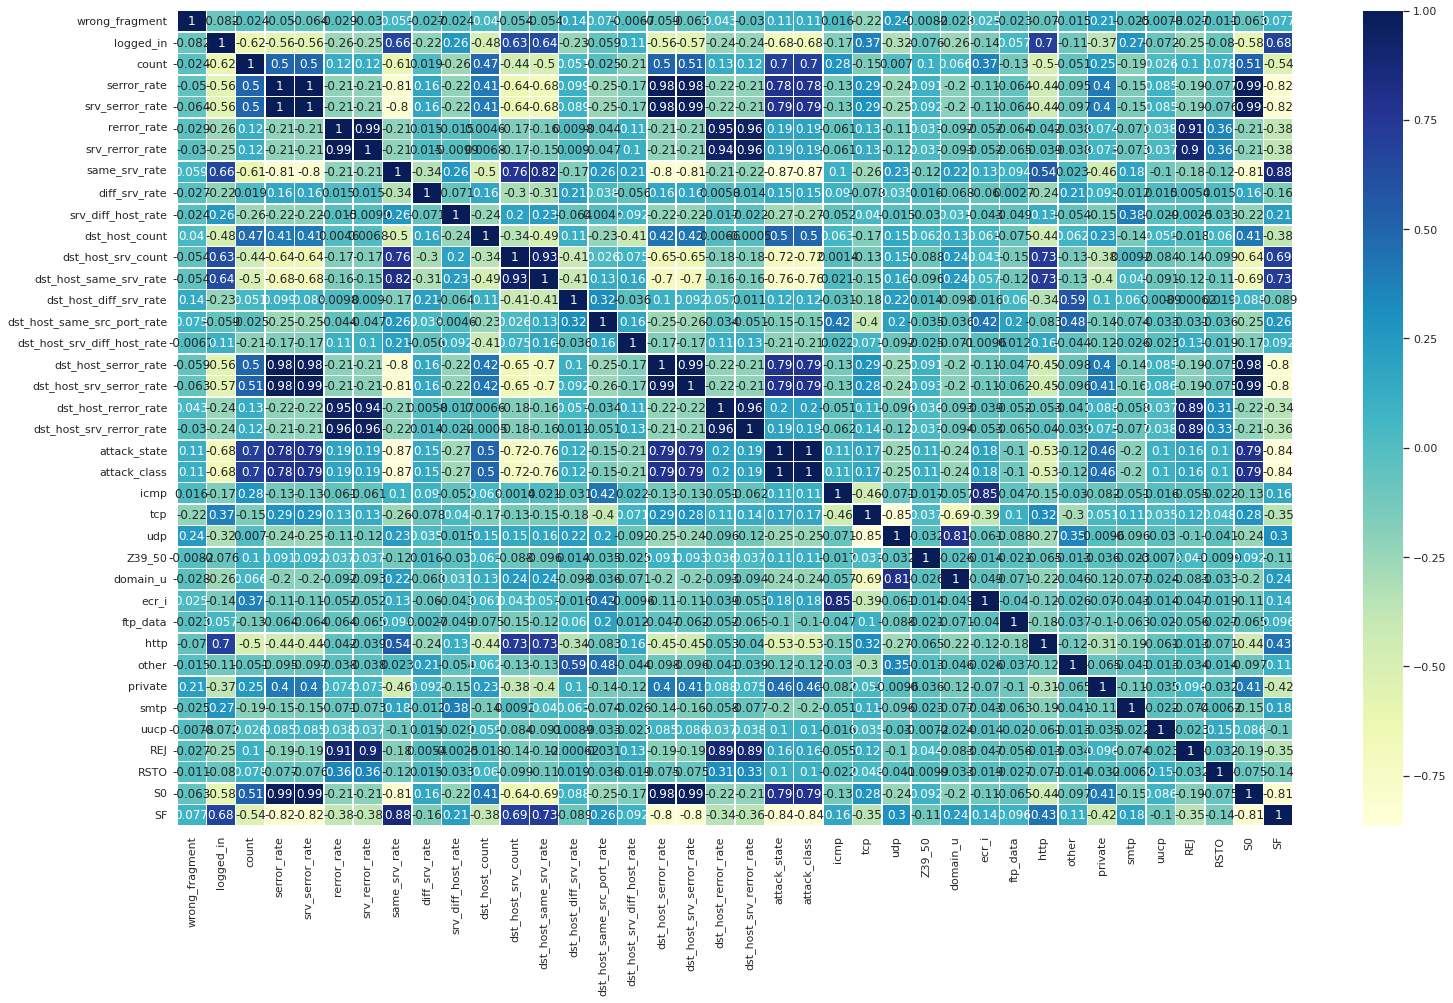

In [ ]:
plt.figure(figsize=(25,15))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

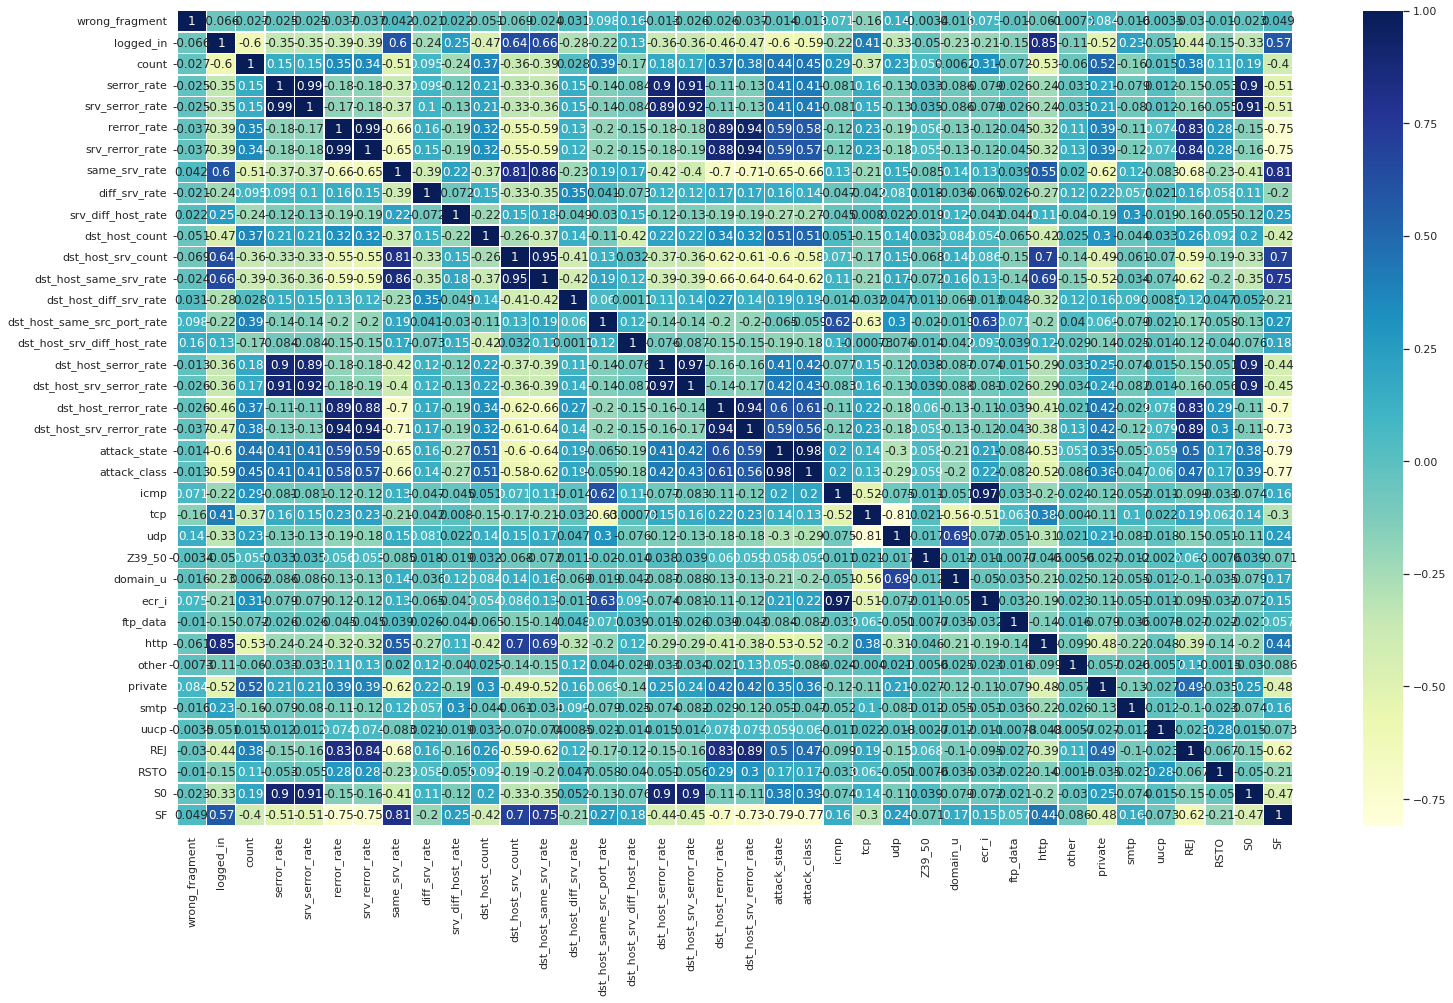

In [ ]:
plt.figure(figsize=(25,15))
g=sns.heatmap(total_data_test[highest_corr.index].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

*J'affiche les attributs les plus associés aux attaques DDoS dans la matrice de corrélation et la carte thermique.*

*J'entraîne l'ensemble de données en supprimants les attributs autres que ces attributs.*

In [39]:
drop_cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]
df.drop(drop_cols, axis=1, inplace=True)  
df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,0,0,1,0,0,0,0,0,0,1
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,0,0,0,1,0,0,0,0,1,0
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,0,1,0,0,0,0,0,0,0,1
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,0,0,0,1,0,0,0,0,1,0
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,1
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,0,0,0,0,0,0,0,0,1,0


In [40]:
drop_cols1 = test_df.loc[:,[i for i in list(test_df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',                          
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                 
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'
]]]
test_df.drop(drop_cols1, axis=1, inplace=True)  
test_df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,0,0,0,0,0,0,0,1,0,0
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
22539,0,1,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,...,0,1,0,0,0,0,0,0,0,1
22540,0,1,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,...,0,1,0,0,0,0,0,0,0,1
22541,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,...,0,0,0,0,0,0,0,0,0,1


In [41]:
data = df.copy()
test_data = test_df.copy()

# 5 Classification sans normalisation des données

In [42]:
X_train = df.drop('attack_class', axis = 1)
X_test = test_df.drop('attack_class', axis = 1)
y_train = df['attack_class']
y_test = test_df['attack_class']

In [43]:
X_train

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,ftp_data,http,other,private,smtp,uucp,REJ,RSTO,S0,SF
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,0,0,1,0,0,0,0,0,0,1
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,0,0,0,1,0,0,0,0,1,0
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,0,1,0,0,0,0,0,0,0,1
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,0,0,0,1,0,0,0,0,1,0
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,1
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,0,0,0,0,0,0,0,0,1,0


In [44]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: attack_class, Length: 125972, dtype: int64

In [45]:
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    
    return prediction_data

## 1 NAIVE BAYES

In [48]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.8033092312469503


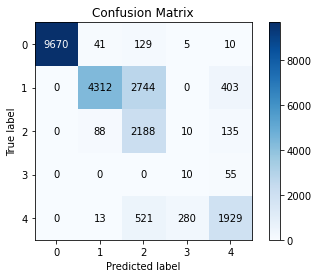

In [56]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [57]:
gnb_res = print(classification_report(y_test, gnb_pred))
gnb_res

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9855
           1       0.97      0.58      0.72      7459
           2       0.39      0.90      0.55      2421
           3       0.03      0.15      0.05        65
           4       0.76      0.70      0.73      2743

    accuracy                           0.80     22543
   macro avg       0.63      0.66      0.61     22543
weighted avg       0.89      0.80      0.82     22543



## 2 DECISION TREE

In [58]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.8894113472031229


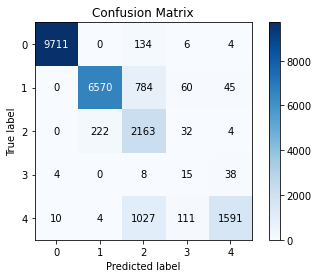

In [59]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [60]:
clf_res = print(classification_report(y_test, dt_pred))
clf_res

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.88      0.92      7459
           2       0.53      0.89      0.66      2421
           3       0.07      0.23      0.10        65
           4       0.95      0.58      0.72      2743

    accuracy                           0.89     22543
   macro avg       0.70      0.71      0.68     22543
weighted avg       0.93      0.89      0.90     22543



## 3 K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.7358381759304441


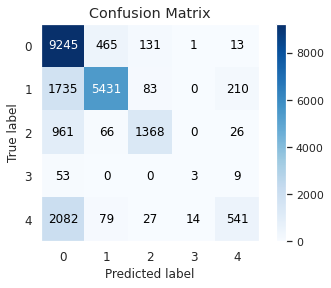

In [ ]:
splt.plot_confusion_matrix(y_test, knn_pred)

In [ ]:
print(classification_report(y_test, knn_pred)) 

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      9855
           1       0.90      0.73      0.80      7459
           2       0.85      0.57      0.68      2421
           3       0.17      0.05      0.07        65
           4       0.68      0.20      0.31      2743

    accuracy                           0.74     22543
   macro avg       0.65      0.49      0.53     22543
weighted avg       0.76      0.74      0.71     22543



## 4 RANDOM FOREST

In [ ]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm_pred=rm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rm_pred))

Accuracy: 0.8887903118484674


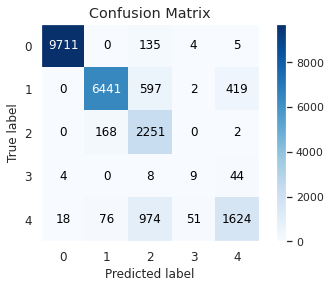

In [ ]:
splt.plot_confusion_matrix(y_test, rm_pred)

In [ ]:
print(classification_report(y_test, rm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.96      0.86      0.91      7459
           2       0.57      0.93      0.70      2421
           3       0.14      0.14      0.14        65
           4       0.78      0.59      0.67      2743

    accuracy                           0.89     22543
   macro avg       0.69      0.70      0.68     22543
weighted avg       0.91      0.89      0.89     22543



## 5 SUPPORT VECTOR MACHINES

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.8843543450294992


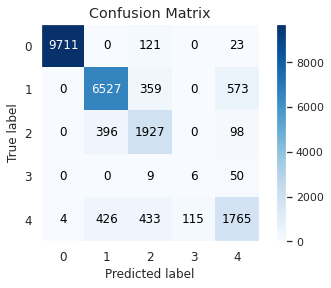

In [ ]:
splt.plot_confusion_matrix(y_test, svm_pred)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.89      0.88      0.88      7459
           2       0.68      0.80      0.73      2421
           3       0.05      0.09      0.06        65
           4       0.70      0.64      0.67      2743

    accuracy                           0.88     22543
   macro avg       0.66      0.68      0.67     22543
weighted avg       0.89      0.88      0.89     22543



# 6 Classification avec la normalisation des données

In [ ]:
print("Longueur du jeux de données train est   :", len(X_train))
print("Longueur du jeux de données test est    :", len(X_test))

Longueur du jeux de données train est   : 125972
Longueur du jeux de données test est    : 22543


In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
X_test= mms.transform(X_test)

## 1 NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))

Accuracy :  0.7599254757574413


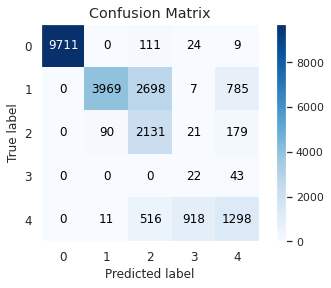

In [ ]:
splt.plot_confusion_matrix(y_test, gnb_pred)

In [ ]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.98      0.53      0.69      7459
           2       0.39      0.88      0.54      2421
           3       0.02      0.34      0.04        65
           4       0.56      0.47      0.51      2743

    accuracy                           0.76     22543
   macro avg       0.59      0.64      0.56     22543
weighted avg       0.87      0.76      0.78     22543



## 2 DECISION TREE

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dt_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.8905646985760547


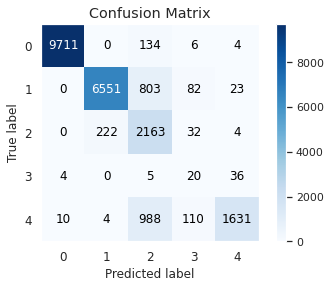

In [ ]:
splt.plot_confusion_matrix(y_test, dt_pred)

In [ ]:
print(classification_report(y_test, dt_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.97      0.88      0.92      7459
           2       0.53      0.89      0.66      2421
           3       0.08      0.31      0.13        65
           4       0.96      0.59      0.73      2743

    accuracy                           0.89     22543
   macro avg       0.71      0.73      0.69     22543
weighted avg       0.93      0.89      0.90     22543



## 3 K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.8709577252362153


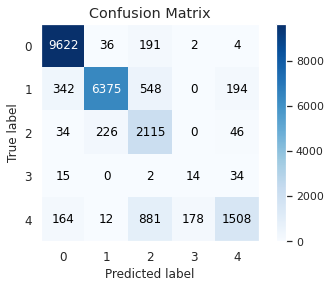

In [ ]:
splt.plot_confusion_matrix(y_test, knn_pred)

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9855
           1       0.96      0.85      0.90      7459
           2       0.57      0.87      0.69      2421
           3       0.07      0.22      0.11        65
           4       0.84      0.55      0.67      2743

    accuracy                           0.87     22543
   macro avg       0.68      0.69      0.67     22543
weighted avg       0.89      0.87      0.87     22543



## 4 RANDOM FOREST

In [ ]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm_pred=rm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, rm_pred))

Accuracy: 0.9027192476600275


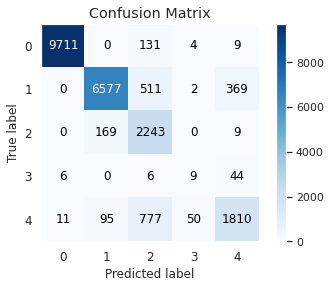

In [ ]:
splt.plot_confusion_matrix(y_test, rm_pred)

In [ ]:
print(classification_report(y_test, rm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.96      0.88      0.92      7459
           2       0.61      0.93      0.74      2421
           3       0.14      0.14      0.14        65
           4       0.81      0.66      0.73      2743

    accuracy                           0.90     22543
   macro avg       0.70      0.72      0.70     22543
weighted avg       0.92      0.90      0.91     22543



## 5 SUPPORT VECTOR MACHINES

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.8766357627644945


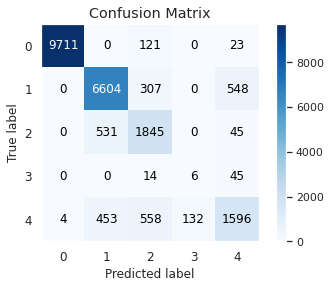

In [ ]:
splt.plot_confusion_matrix(y_test, svm_pred)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9855
           1       0.87      0.89      0.88      7459
           2       0.65      0.76      0.70      2421
           3       0.04      0.09      0.06        65
           4       0.71      0.58      0.64      2743

    accuracy                           0.88     22543
   macro avg       0.65      0.66      0.65     22543
weighted avg       0.88      0.88      0.88     22543

